# Objective

A gas turbine is a combustion engine that can convert natural gas or other liquid fuels to mechanical energy. It has multitude of applications in different industries. Our focus is on Marine applications predominantly on naval propulsion plants. The mechanical energy generated for the combustion chamber then drives a generator that produces electrical energy. Gas Turbines are valued for their high power – to weight ratio and their ships resulting acceleration and the ability to get underway quickly. 
Increasing use of Gas turbine application demands high reliability, economic sustainability which in turn increases the maintenance cost. Depending on the strategy adopted by the application the costs can vary, in order to cut the costs effectively and prevent the components from breakdown condition based maintenance approach is being used.
The main idea here is to propose Machine learning models to get a good prediction accuracy of compressor deterioration, and most influential factors that effect this. For this analysis the data used is generated from a sophisticated simulator of a gas turbine, mounted on a Frigate characterized by a Combined Diesel Electric and Gas propulsion plant type.
The results will show the most important factors that are used to predict the deterioration and effectiveness of the models approached to use in marine applications.

# Data Information

The experiments have been carried out by means of a numerical simulator of a naval vessel (Frigate) characterized by 
a Gas Turbine (GT) propulsion plant. The different blocks forming the complete simulator (Propeller, Hull, GT, 
Gear Box and Controller) have been developed and fine tuned over the year on several similar real propulsion plants.
In view of these observations the available data are in agreement with a possible real vessel. 
In this release of the simulator it is also possible to take into account the performance decay over time of the GT 
components such as GT compressor and turbines. 
The propulsion system behaviour has been described with this parameters: 
- Ship speed (linear function of the lever position lp). 
- Compressor degradation coefficient kMc. 
- Turbine degradation coefficient kMt. 
so that each possible degradation state can be described by a combination of this triple (lp,kMt,kMc). 
The range of decay of compressor and turbine has been sampled with an uniform grid of precision 0.001 so to have a good granularity of representation. 
In particular for the compressor decay state discretization the kMc coefficient has been investigated in the domain
[1; 0.95], and the turbine coefficient in the domain [1; 0.975]. 
Ship speed has been investigated sampling the range of feasible speed from 3 knots to 27 knots with a granularity of 
representation equal to tree knots. 
A series of measures (16 features) which indirectly represents of the state of the system subject to performance 
decay has been acquired and stored in the dataset over the parameter's space. 


# Attribute Information

- A 16-feature vector containing the GT measures at steady state of the physical asset: 
Lever position (lp) [ ] 
Ship speed (v) [knots] 
Gas Turbine (GT) shaft torque (GTT) [kN m] 
GT rate of revolutions (GTn) [rpm] 
Gas Generator rate of revolutions (GGn) [rpm] 
Starboard Propeller Torque (Ts) [kN] 
Port Propeller Torque (Tp) [kN] 
Hight Pressure (HP) Turbine exit temperature (T48) [C] 
GT Compressor inlet air temperature (T1) [C] 
GT Compressor outlet air temperature (T2) [C] 
HP Turbine exit pressure (P48) [bar] 
GT Compressor inlet air pressure (P1) [bar] 
GT Compressor outlet air pressure (P2) [bar] 
GT exhaust gas pressure (Pexh) [bar] 
Turbine Injecton Control (TIC) [%] 
Fuel flow (mf) [kg/s] 
GT Compressor decay state coefficient 
GT Turbine decay state coefficient


# Data Cleaning



This data is provided in two text format(.txt) files and one has the data(data.txt) and the other has the name of the
features(Features.txt).To perform further analysis, the txt files was converted to dataframes using pandas package and
a dataframe df is create with data and approriate headers.
Two columns have been dropped as it had a constatnt value through out.
('GT Compressor inlet air temperature','GT Compressor inlet air pressure')


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.mlab as mlab
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import KFold
from sklearn.svm import NuSVR as SVR
from sklearn.model_selection import GridSearchCV
import csv
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [1]:

data = pd.read_csv('./data.txt',sep='\s+',header=None)
df_header = pd.read_csv('./Features.txt',header = None)
features = df_header[0].tolist()
data.columns = features
data.head()

,Lever position,Ship speed,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,HP Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [2]:
'''Dropping the two columns which have constants'''
df1 = data.drop('GT Compressor inlet air temperature',axis=1)
df3 = df1.drop('GT Compressor inlet air pressure',axis=1)
df3.head()


,Lever position,Ship speed,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,HP Turbine exit temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975


Summary Statistics

In [3]:
df3.describe()

,Lever position,Ship speed,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,HP Turbine exit temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,646.215331,2.352963,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,72.675882,1.084770,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,540.442000,1.093000,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,578.092250,1.389000,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,637.141500,2.083000,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,693.924500,2.981000,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,789.094000,4.560000,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


# Exploratory Data Analysis

Degrading a component in an engine will always lead to observable changes in engine parameters due
impact of operating points and also effects the engine components. In this dataset we want to check
the compressor degration coeffient alters which of the components.
To do this we consider a few scatter plots for the features according to vehicle mechanics and check
how well are they correlated.


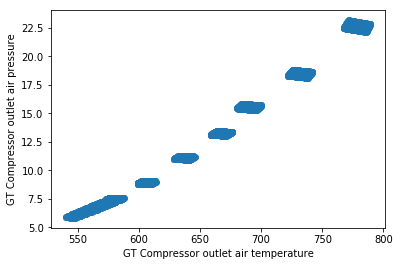

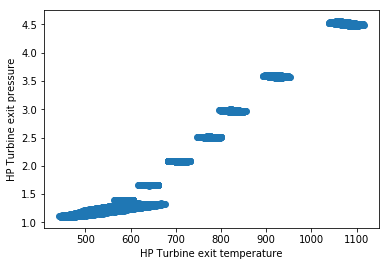

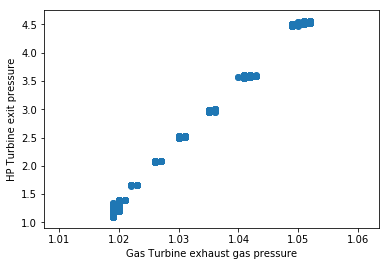

In [4]:


plt.scatter(df3['GT Compressor outlet air temperature'],df3['GT Compressor outlet air pressure'])
plt.xlabel('GT Compressor outlet air temperature')
plt.ylabel('GT Compressor outlet air pressure')
plt.show()
plt.scatter(df3['HP Turbine exit temperature'],df3['HP Turbine exit pressure'])
plt.xlabel('HP Turbine exit temperature')
plt.ylabel('HP Turbine exit pressure')
plt.show()
plt.scatter(df3['Gas Turbine exhaust gas pressure'],df3['HP Turbine exit pressure'])
plt.xlabel('Gas Turbine exhaust gas pressure')
plt.ylabel('HP Turbine exit pressure')
plt.show()

The above relations between pressure and temperatures is pretty obvious as there is a direct proportionality between 
them. This may lead to high correlation coefficient between these variables. Understand the correlation between all 
the features we apply correration (corr) method on our dataframe.
The below tabular column shows that the pearson coefficient factor and the relaiton between these variables.

Understanding the correlation would be helpful in building a regression model.


In [5]:
X= df3.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
X

,Lever position,Ship speed,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,HP Turbine exit temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
Lever position,1.0,1.0,0.96,0.96,0.99,0.96,0.96,0.96,0.98,0.96,0.97,0.95,0.91,0.93,5.5e-18,1.2e-17
Ship speed,1.0,1.0,0.96,0.96,0.99,0.96,0.96,0.96,0.98,0.96,0.97,0.95,0.91,0.93,0.0,0.0
Gas Turbine shaft torque,0.96,0.96,1.0,0.99,0.93,1.0,1.0,0.99,0.99,1.0,1.0,1.0,0.98,1.0,0.003,0.00036
Gas Turbine rate of revolutions,0.96,0.96,0.99,1.0,0.94,0.99,0.99,0.98,0.99,1.0,1.0,0.99,0.96,0.98,0.0014,-1.8e-05
Gas Generator rate of revolutions,0.99,0.99,0.93,0.94,1.0,0.93,0.93,0.94,0.97,0.94,0.95,0.92,0.88,0.9,-0.019,0.01
Starboard Propeller Torque,0.96,0.96,1.0,0.99,0.93,1.0,1.0,0.99,0.99,1.0,1.0,1.0,0.98,0.99,0.00075,0.0001
Port Propeller Torque,0.96,0.96,1.0,0.99,0.93,1.0,1.0,0.99,0.99,1.0,1.0,1.0,0.98,0.99,0.00075,0.0001
HP Turbine exit temperature,0.96,0.96,0.99,0.98,0.94,0.99,0.99,1.0,0.99,0.99,0.99,0.98,0.97,0.99,-0.04,-0.038
GT Compressor outlet air temperature,0.98,0.98,0.99,0.99,0.97,0.99,0.99,0.99,1.0,0.99,0.99,0.98,0.96,0.98,-0.047,-0.017
HP Turbine exit pressure,0.96,0.96,1.0,1.0,0.94,1.0,1.0,0.99,0.99,1.0,1.0,1.0,0.98,0.99,0.0082,-0.0027


# Inferential Statistics

The effectiveness of the CBM rely on the quality of the predictive models , but more than predicting it is 
important to understand what are the features that contribute in our regression analysis and prediction .
This permits high efficacy in advance the cause of the failure or in our case degradation. 
This will help reduce the costs, derates and any unplanned shutdown.

In [7]:

y = df3['GT Compressor decay state coefficient']
X = df3.drop('GT Compressor decay state coefficient',axis=1)
model1 = sm.OLS(y, X)
results1 = model1.fit()
print(results1.summary())
model = sm.OLS(y,X).fit()

                                      OLS Regression Results                                     
Dep. Variable:     GT Compressor decay state coefficient   R-squared:                       1.000
Model:                                               OLS   Adj. R-squared:                  1.000
Method:                                    Least Squares   F-statistic:                 3.732e+07
Date:                                   Fri, 02 Feb 2018   Prob (F-statistic):               0.00
Time:                                           22:02:58   Log-Likelihood:                 47143.
No. Observations:                                  11934   AIC:                        -9.426e+04
Df Residuals:                                      11920   BIC:                        -9.415e+04
Df Model:                                             14                                         
Covariance Type:                               nonrobust                                         
                    

The strong multicollinearity is obvious as we have highly correlated features. Although high multicollinearity
among predictor variables does not prevent good, we could eliminate the redudant features for better accuracy of our regression analysis.Variance inflation factor and feature selection comes in handy to eliminate predictor variables with high variance inflation factor.

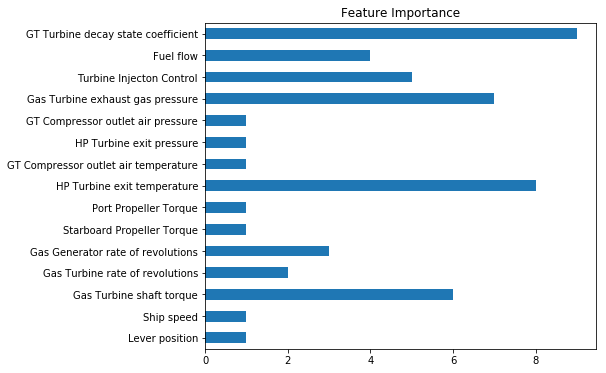

In [68]:
#Feature selection
lm = LinearRegression()
rfe = RFE(lm)
rfe.fit(X, y)
ranking = rfe.ranking_
feature_importance = pd.Series(rfe.ranking_,index=X.columns)
feature_importance.sort_index()
feature_importance.plot(kind='barh',figsize=(7,6))
plt.title('Feature Importance')
plt.show()

The above graph priorities the features based on its effect of compressor degradation coefficient.

To get more absolute selection of the feature we could implement regularization method using LASSO 
regression or L1 regularization. Implementing this regression helps eliminate all the unwanted features


In [9]:

alpha = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=1e-10,normalize = True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
df_FS= pd.DataFrame()
df_FS['Features'] = X.columns
df_FS['Lassocoeff'] = lasso_coef
df_FS



/Users/Nidhi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,Features,Lassocoeff
0,Lever position,9.865315e-03
1,Ship speed,-1.385395e-03
2,Gas Turbine shaft torque,1.083130e-06
3,Gas Turbine rate of revolutions,-6.227242e-05
4,Gas Generator rate of revolutions,5.060688e-06
5,Starboard Propeller Torque,-2.028758e-04
6,Port Propeller Torque,-1.918103e-18
7,HP Turbine exit temperature,3.342540e-04
8,GT Compressor outlet air temperature,-2.271349e-03
9,HP Turbine exit pressure,1.965167e-01


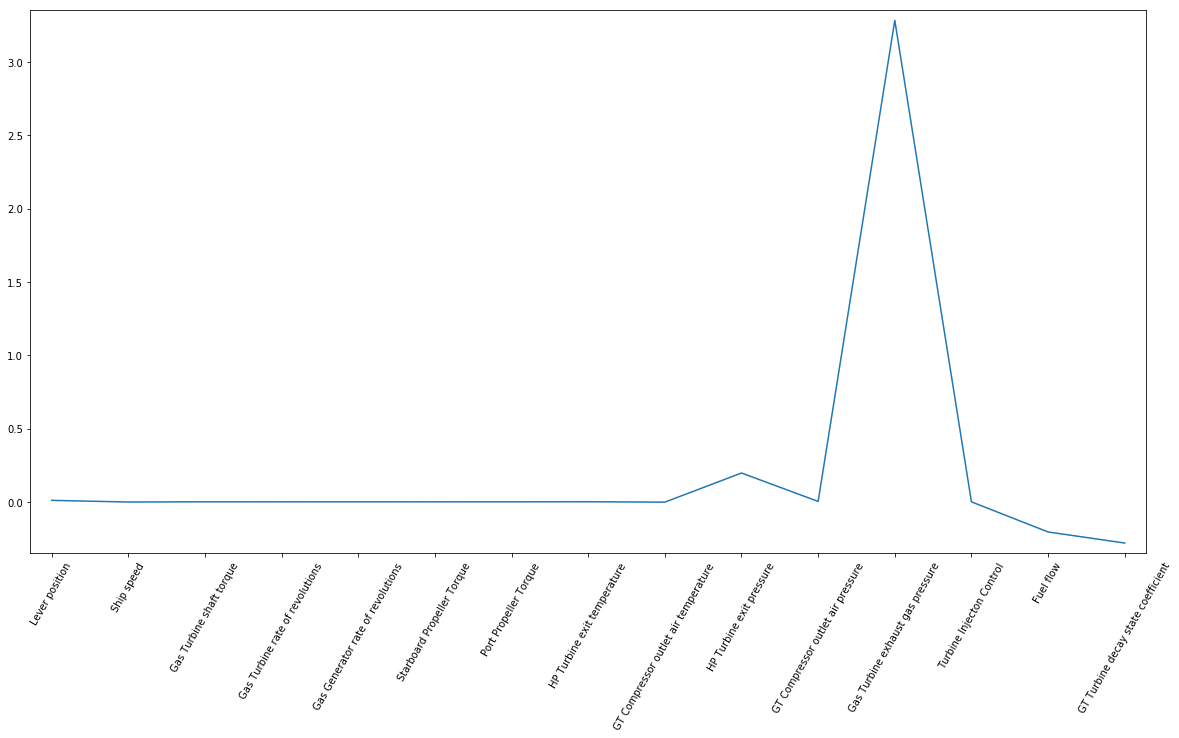

In [10]:
plt.figure(figsize=(20,10))
# Plot the coefficients
plt.plot(range(len(X.columns)), lasso_coef)
plt.xticks(range(len(X.columns)), X.columns, rotation=60)
plt.margins(0.02)
plt.show()

With help of L1 regularization, we get all the required features to eliminate multicollinearity problem.
Considering all the feature give by above methos we run Ordinary least sqaure regression again to check
the collinearity.
Feature with absolute magitudue > 0 are :

    HP Turbine exit pressure            
    GT Compressor outlet air pressure   
    Gas Turbine exhaust gas pressure     
    Fuel flow 


For visualization we also consider pair plottinng to see how the data is varying,distribution,and check the linearity.

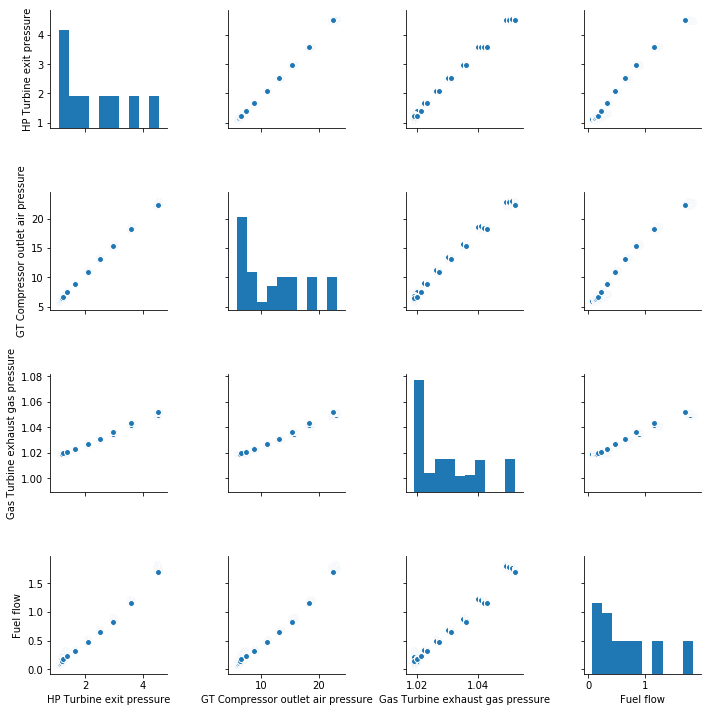

In [39]:

df_selectedfeatures = df3[['HP Turbine exit pressure','GT Compressor outlet air pressure','Gas Turbine exhaust gas pressure','Fuel flow']]
sns.pairplot(df_selectedfeatures)
plt.show()
    
    
    

In [11]:

X_afterL1 = df3[['HP Turbine exit pressure','GT Compressor outlet air pressure','Gas Turbine exhaust gas pressure', 'Fuel flow']]
y = df3['GT Compressor decay state coefficient']
model = sm.OLS(y,X_afterL1).fit()
print(model.summary())
                   

                                      OLS Regression Results                                     
Dep. Variable:     GT Compressor decay state coefficient   R-squared:                       1.000
Model:                                               OLS   Adj. R-squared:                  1.000
Method:                                    Least Squares   F-statistic:                 1.434e+07
Date:                                   Fri, 02 Feb 2018   Prob (F-statistic):               0.00
Time:                                           22:02:59   Log-Likelihood:                 33958.
No. Observations:                                  11934   AIC:                        -6.791e+04
Df Residuals:                                      11930   BIC:                        -6.788e+04
Df Model:                                              4                                         
Covariance Type:                               nonrobust                                         
                    

Including only the above features reduces multicollinearity problem.

In [12]:

quartile_1, quartile_3 = np.percentile(df3["GT Compressor decay state coefficient"], [25, 75])
print('Confidence Interval of GT Compressor decay state coefficient',quartile_1, quartile_3)

/Users/Nidhi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Confidence Interval of GT Compressor decay state coefficient 0.962 0.988


# Will this model predict degradation coefficient if Gas Turbine exhaust gas pressure is increased by 20 bar?


We compare the performance of both regression models the one with high multicollinearity or model which has all the features and then the model build with Feature selection.


min and max of the prediction variable 0.943318534957 1.00538118153


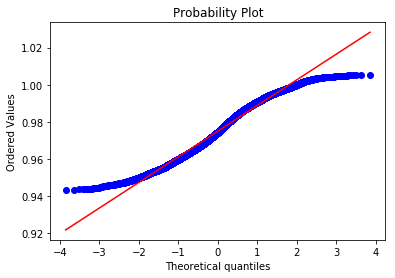

In [13]:
#Predicting  with first model i.e with X,y where X is datafram with all the features.

model_pred = sm.OLS(y,X).fit()
y_pred1 = model_pred.predict(X)
print('min and max of the prediction variable',y_pred1.min(),y_pred1.max())
stats.probplot(y_pred1, dist="norm", plot=plt)
plt.show()

/Users/Nidhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


min and max of the prediction variable 0.961642345554 0.984425413626


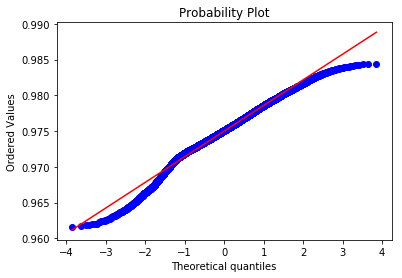

In [14]:
df_test = X_afterL1 
df_test["Gas Turbine exhaust gas pressure"] += 20
X_pred = df_test
model_pred = sm.OLS(y,X_pred).fit()
y_pred1 = model_pred.predict(X_pred)
y_pred1.min(),y_pred1.max()
print('min and max of the prediction variable',y_pred1.min(),y_pred1.max())
stats.probplot(y_pred1, dist="norm", plot=plt)
plt.show()

The second model has give accurate results, by predicting GT Compressor decay state coefficient within the confidence intervals.

From the inferential statistics we get the most influential features for predicting the deteoration. The above test also show the difference in the two models when we increase the Gas exhaust pressure by 20bar and how the second model produces accurate predictons that is with in the confidence interval. 

# Predictive Maintaince


The primary purpose of our regression analysis is to predict a new response y, so we don't have to worry much about multicollinearity. We built Linear regression,SVM and RandomForest models and compare which model gives a better performance in predicting the degradation coefficient.
Intialy we crete the model and check the mean sqaured error and try to imporve the model using Grid Search CSV and plot the learning curves to the bias and variance trade off. This is important for out data because, we are building the model for prediction and condition based maintance,learning curves helps us understand how well the model will predict when new data comes in.

In [16]:

newdf = pd.DataFrame(preprocessing.scale(df3), index=df3.index, columns=df3.columns)


In [17]:

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

y = newdf['GT Compressor decay state coefficient']
X = newdf.drop('GT Compressor decay state coefficient',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


# Linear Regression

Fit a model X_train, and calculate MSE with Y_train: 0.09861042024153277
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.09999187594718391
Score : 0.899498804257


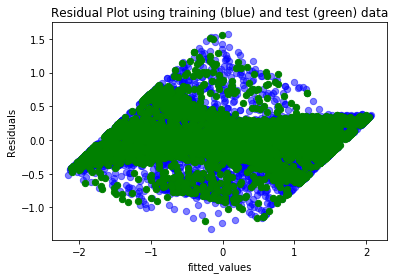

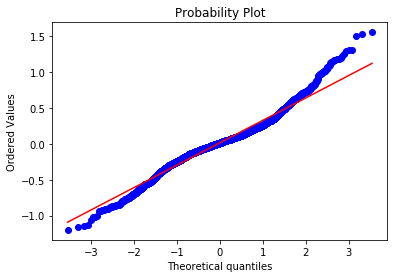

In [62]:
#Bulding a Regression Model

lm = LinearRegression()
lm.fit(X_train, y_train)

pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_train - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_test - lm.predict(X_test)) ** 2))
print("Score :", lm.score(X_test,y_test))
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='g', s=40)
#plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.xlabel('fitted_values')
plt.ylabel('Residuals')
plt.show()
#Probability plot
residual =lm.predict(X_test) - y_test
stats.probplot(residual, dist="norm", plot=plt)
plt.show()
mu= np.mean(residual)
sigma=np.std(residual)




The plots for this model looks pretty decent as it is hard to overfit. Below are the learning curve plots to check the same.

Create a function for plotting the learning curve, since this function will be used for all the models.

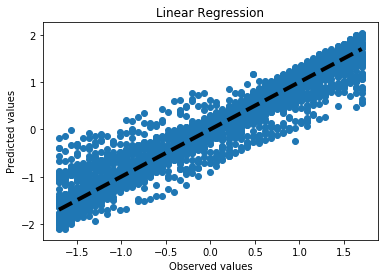

In [45]:
plt.scatter(y_test,pred_test)
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.show()

In [19]:


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
   
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


/Users/Nidhi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Nidhi/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [65]:
rmse = np.sqrt(mean_squared_error(y_test,pred_test))
print('Root Mean Squared Error for Linear Regression' , rmse)
print('Varinace between observes a predicted values', np.var(y_test-pred_test))

Root Mean Squared Error for Linear Regression 0.316214920501
Varinace between observes a predicted values 0.09982268721182895


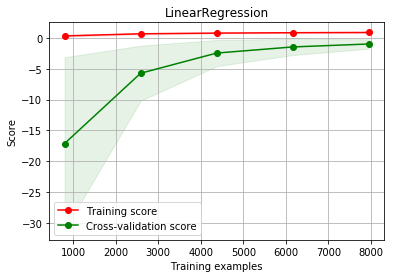

In [20]:
plot_learning_curve(lm, "LinearRegression", X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

# Support Vector Regression

For Support vector regression,we test for different kernels

In [21]:

hypo = SVR()
svr_rbf = SVR(kernel='rbf', C=0.1, gamma=0.1)
svr_rbf.fit(X_train,y_train)
print('RBF Kernel score',svr_rbf.score(X_test,y_test))
y_rbf_predict = svr_rbf.predict(X_test)



RBF Kernel score 0.324459136614


In [22]:
svr_lin = SVR(kernel='linear', C=0.1)
y_lin = svr_lin.fit(X_train,y_train.ravel())
y_lin_predict = svr_lin.predict(X_test)
print('Linear Kernel score',svr_lin.score(X_test,y_test))

Linear Kernel score 0.688818749927


In [23]:
svr_poly = SVR(kernel='poly', C=0.1, degree=2)
y_poly = svr_poly.fit(X_train,y_train)
y_poly_predict = svr_poly.predict(X_test)
print('Poly Kernel score',svr_poly.score(X_test,y_test))

Poly Kernel score 0.0624221306291


Linear Kernel has high score so we build SVR model and check its metric and compare with the other models.

In [24]:


#df = df.sort()


#cross_val_score
from sklearn.svm import NuSVR as SVR
hypo = SVR()
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


pipeline = make_pipeline(preprocessing.StandardScaler(), SVR(max_iter=10))

hyperparameters = {'C': [0.06,0.1,0.0001,0.000001], 'gamma': [0.001, 0.0001,10],'kernel':['rbf']}

grid_SVR = GridSearchCV(SVR(kernel='linear'), hyperparameters,cv=3)

start = time.time()
grid_SVR.fit(X_train,y_train)
end = time.time()

y_pred = grid_SVR.predict(X_test)
# Compute and print the metrics

r2 = grid_SVR.score(X_test, y_test)

print("Tuned SVR C,gamma: {}".format(grid_SVR.best_params_))
print("Tuned SVR R squared: {}".format(r2))
print("Tuned SVR MSE :{}".format(mean_squared_error(y_test,grid_SVR.predict(X_test))))
#
residual =grid_SVR.predict(X_test) - y_test

import matplotlib.pyplot as plt


scores = grid_SVR.best_score_
print('SVR Best Score',scores)



Tuned SVR C,gamma: {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
Tuned SVR R squared: 0.8844675184518125
Tuned SVR MSE :0.1149469862264699
SVR Best Score 0.788352966334


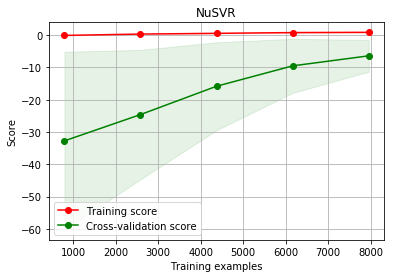

In [25]:
plot_learning_curve(grid_SVR,"NuSVR", X, y, n_jobs=-1, cv=None, train_sizes=np.linspace(.1, 1.0, 5))
plt.show()

In [66]:
#Root Mean squared error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for NuSVR' , rmse)
print('Varinace between observes a predicted values', np.var(y_test-y_pred))

Root Mean Squared Error for NuSVR 0.339038325601
Varinace between observes a predicted values 0.11489961732903231


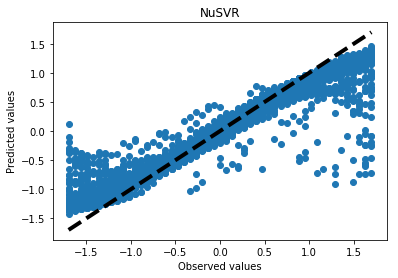

In [50]:
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('NuSVR')
plt.show()

# Random Forest

Tuned RF R squared: 0.8847856462052468
Tuned RF MSE: 0.11463047068034599


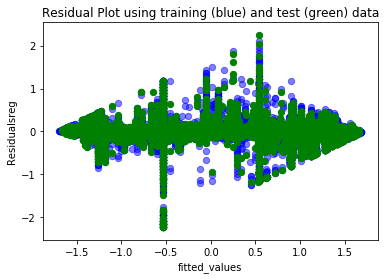

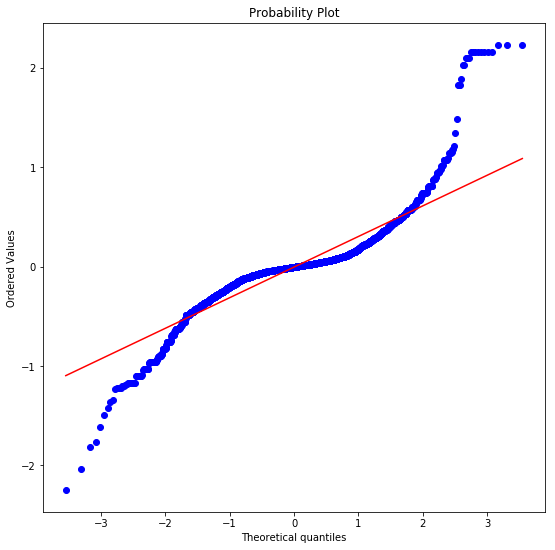

In [27]:


dt_range = range(1, 11)
params = dict(max_depth=dt_range)
from sklearn.model_selection import cross_val_score

RF_reg = RandomForestRegressor(max_depth=10,random_state=0)

# Fit it to the data
RF_reg.fit(X_train,y_train.ravel())

y_pred_RF = RF_reg.predict(X_test)


print("Tuned RF R squared: {}".format( RF_reg.score(X_test, y_test)))
print("Tuned RF MSE: {}".format(mean_squared_error(y_test, y_pred_RF)))

plt.scatter(RF_reg.predict(X_train), RF_reg.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(RF_reg.predict(X_test), RF_reg.predict(X_test) - y_test, c='g', s=40)

plt.title('Residual Plot using training (blue) and test (green) data')
plt.xlabel('fitted_values')
plt.ylabel('Residualsreg')
plt.show()
residual =y_test - y_pred_RF

plt.figure(figsize=(9,9))
stats.probplot(residual, dist="norm", plot=plt)
plt.show()


The Random forest gives a decent score but it can be imporoved with GridSearch CV.

In [28]:
#RandomisedSearch, Grid Sarech and crossval score

#Tune model using cross-validation pipeline
pipeline = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(n_estimators=100,oob_score = True))

min_samples_leaf = [1,5,10,50,100,200,500]
#Declare hyperparameters to tune
hyperparameters = {'randomforestregressor__min_samples_leaf':min_samples_leaf,'randomforestregressor__criterion':['mse'],'randomforestregressor__max_features': ['auto', 'sqrt', 'log2',0.25
                                                                                                     ],'randomforestregressor__max_depth': [None, 5, 3, 1,10]}

print(hyperparameters)
#Evaluate model pipeline on test data
RF_reg_GSV = GridSearchCV(pipeline, hyperparameters, cv=3)


{'randomforestregressor__min_samples_leaf': [1, 5, 10, 50, 100, 200, 500], 'randomforestregressor__criterion': ['mse'], 'randomforestregressor__max_features': ['auto', 'sqrt', 'log2', 0.25], 'randomforestregressor__max_depth': [None, 5, 3, 1, 10]}


1517630972.9990451
Tuned RF r-sqrd 0.9973255155278294
Tuned RF MSE 0.002660930724120889


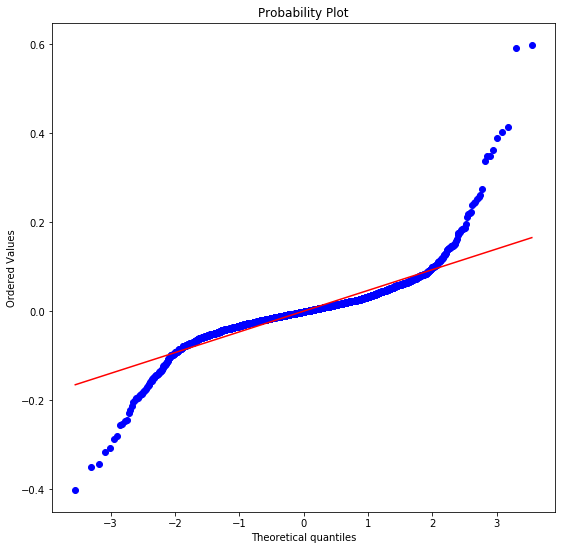

Time taken by the model to fit the data 549.2464547157288
True


In [29]:


start = time.time()
print(start)
RF_reg_GSV.fit(X_train, y_train.ravel())
end = time.time()
#print(end - start)
pred = RF_reg_GSV.predict(X_test)
print("Tuned RF r-sqrd {}".format(r2_score(y_test, pred)))
print("Tuned RF MSE {}".format(mean_squared_error(y_test, pred)))

residual =y_test - pred
plt.figure(figsize=(9,9))
stats.probplot(residual, dist="norm", plot=plt)
plt.show()

print('Time taken by the model to fit the data', end - start)
#print('Best fit parameters',RF_reg_GSV.cv_results_['params'])
#Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
print(RF_reg_GSV.refit == True)

In [67]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
print('Root Mean Squared Error for Random Forest' , rmse)
print('Varinace between observes a predicted values', np.var(y_test-pred))

Root Mean Squared Error for Random Forest 0.0515842100271
Varinace between observes a predicted values 0.0026609055698455213


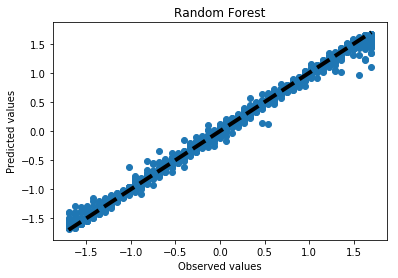

In [51]:
plt.scatter(y_test,pred)
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.show()

Learning curve for Random Forest

The time to fit the data to plot learning curve 3565.3768162727356


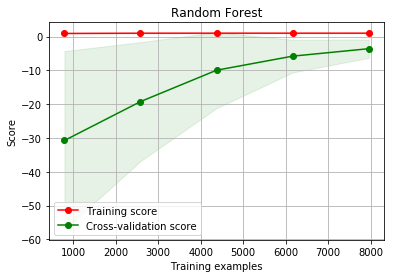

In [31]:

start = time.time()
plot_learning_curve(RF_reg_GSV, "Random Forest", X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
end = time.time()
print('The time to fit the data to plot learning curve',end-start)
plt.show()


# Conclusion

The effectiveness of the condition-based maintenance rely on the quality of the predictive methods, but more than that, the understanding each variable for the failure  and its relationship can permit a higher efficacy to intervene in advance, reducing costs of unplanned shutdowns.
This analysis shows the most important features affecting the Gas Turbine Compressor degradation – 

1.The regularization methods reduces the coefficients of magnitude to give most import features in the prediction.

2.From the Predictive Analytics we compare Random Forest and SVR models and see that RandomForest model has good prediction accuracy and crossvalidation prediction plots also show that RandomForest has less variance and would be a better model for prediction in this application.

3.With software strategy adopted by the application if there is a diagnostic raised when ever the features meet the threshold and then investigating before the actual failure would prevent the unplanned shutdowns and reduce the maintenance costs.
